In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display_html
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from itertools import chain,cycle
import plotly.figure_factory as ff



cleaned_sharks = pd.read_csv('../data/cleaned_shark.csv', encoding='ISO-8859-1')


In [54]:
cleaned_sharks.head();

In [55]:
cleaned_sharks.columns

Index(['Case Number', 'Year', 'Country', 'Month', 'Fatal', 'Name', 'Age',
       'Sex', 'Species', 'Continent', 'Sea', 'Area', 'Location', 'Week Day',
       'Date', 'Season', 'Activity', 'Injury', 'Time',
       'Investigator or Source', 'Case File (PDF)', 'Case File (URL)', 'Type'],
      dtype='object')

Análisis

- Relación entre actividad y lesión o si hubo muerte
- Temporada en la que más ataques se produzcan
- Frecuencia de ataques por país
- Especies que produzcan más accidentes fatales

Total de casos por año


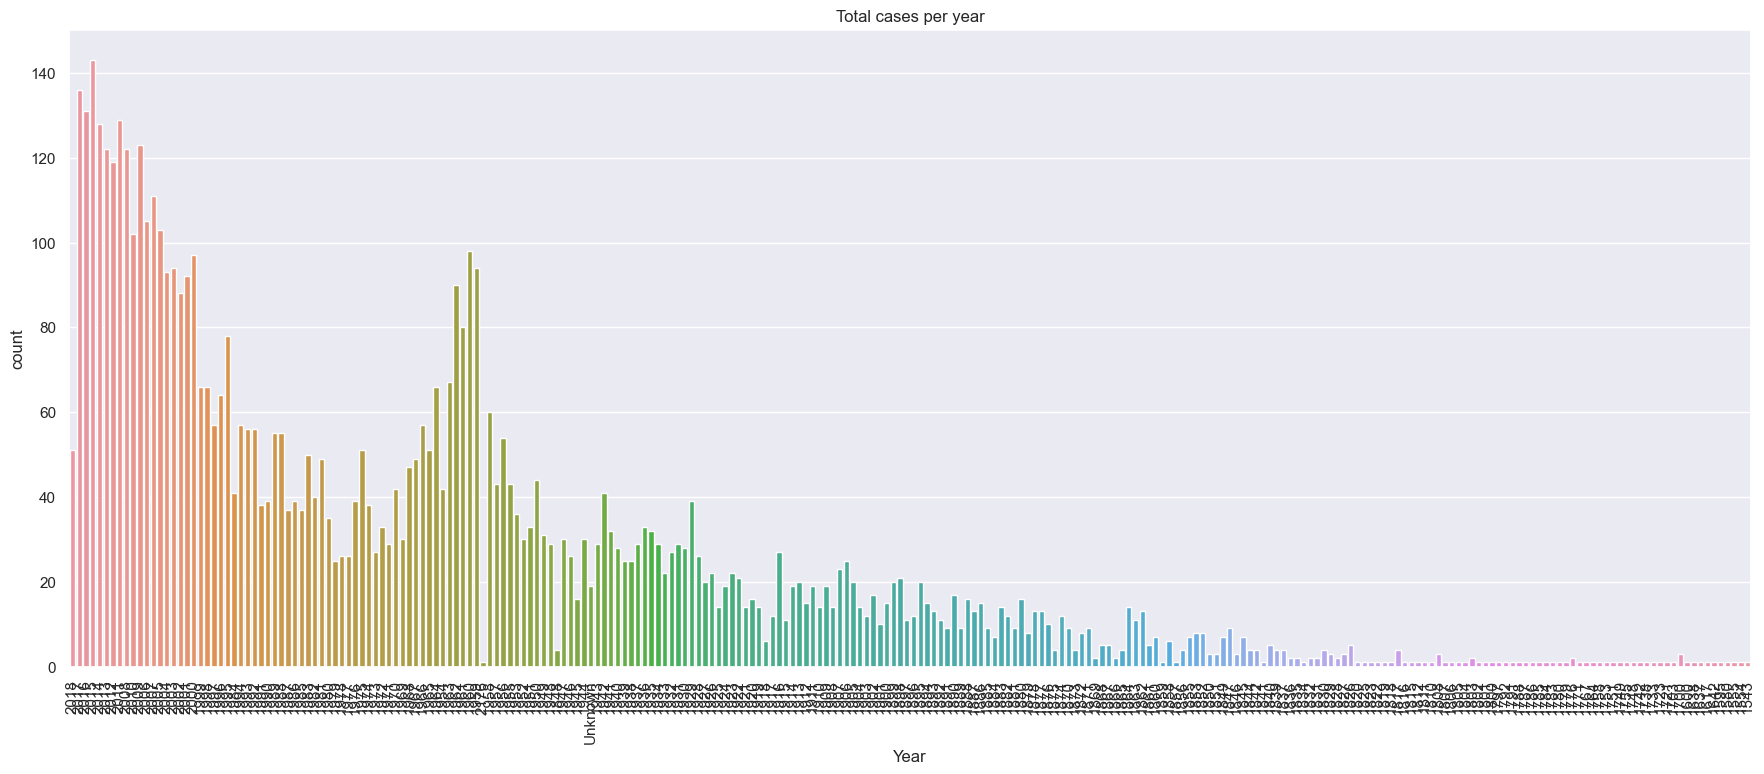

In [56]:
#tamaño del gráfico
sns.set(rc={'figure.figsize':(21.7,8.27)})

#rotar las etiquetas
plt.xticks(rotation=90)

#creación del gráfico
fig_year_full = sns.countplot(x=cleaned_sharks.Year).set(title = "Total cases per year")
plt.show()

Total casos por mes

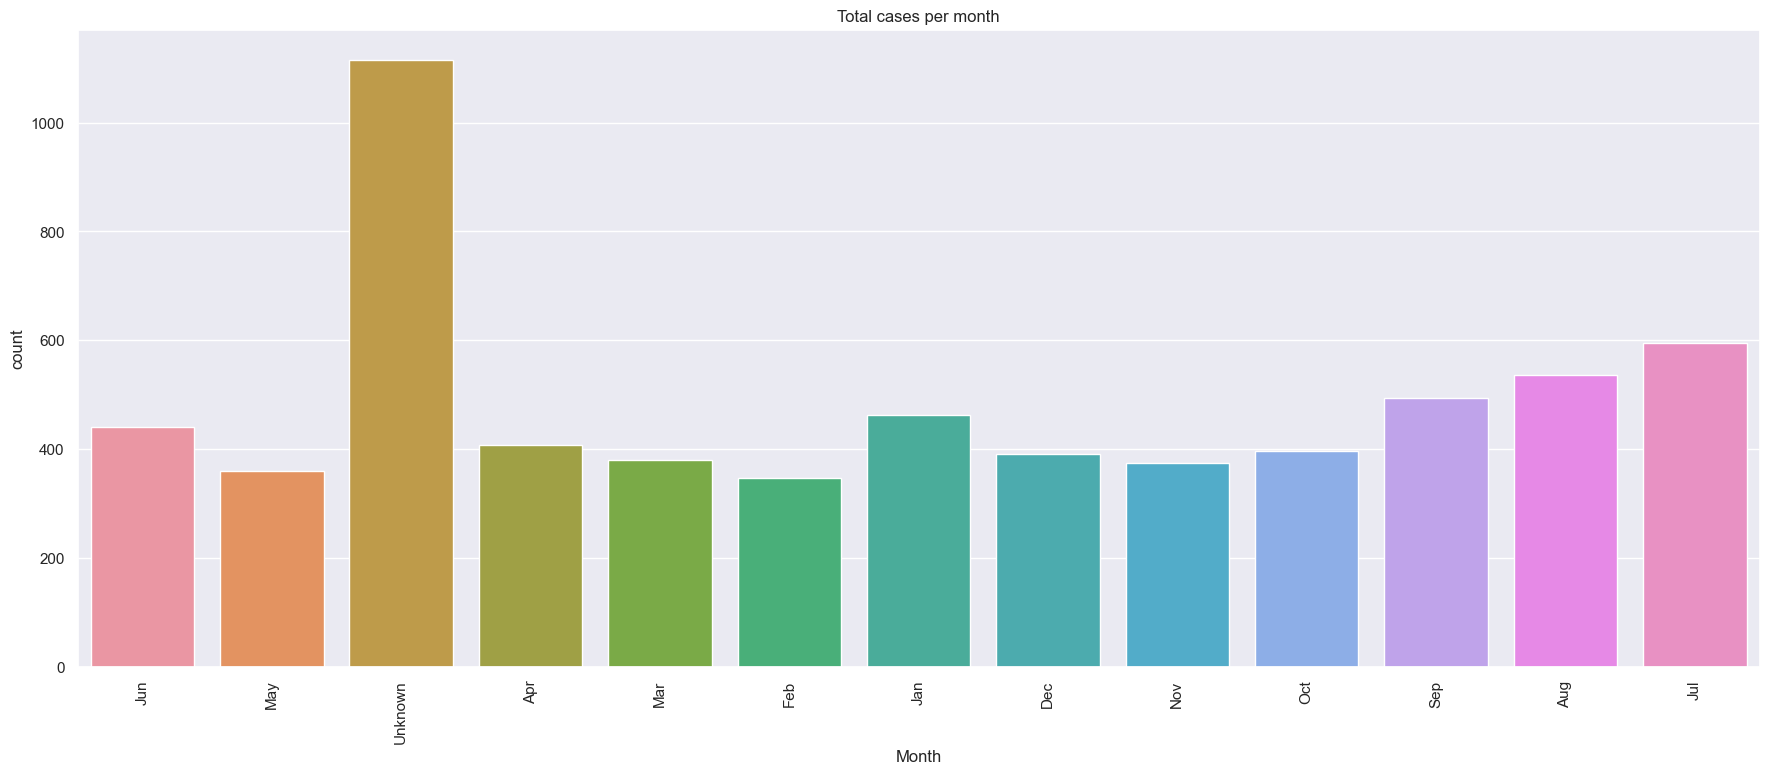

In [57]:
#tamaño del gráfico
sns.set(rc={'figure.figsize':(21.7,8.27)})

#rotar las etiquetas
plt.xticks(rotation=90)

#creación del gráfico
fig_month = sns.countplot(x=cleaned_sharks.Month).set(title = "Total cases per month")
plt.show()

Se observa que la mayor cantidad de ataques se producen en Julio

Edad más atacada

Total de casos por Country

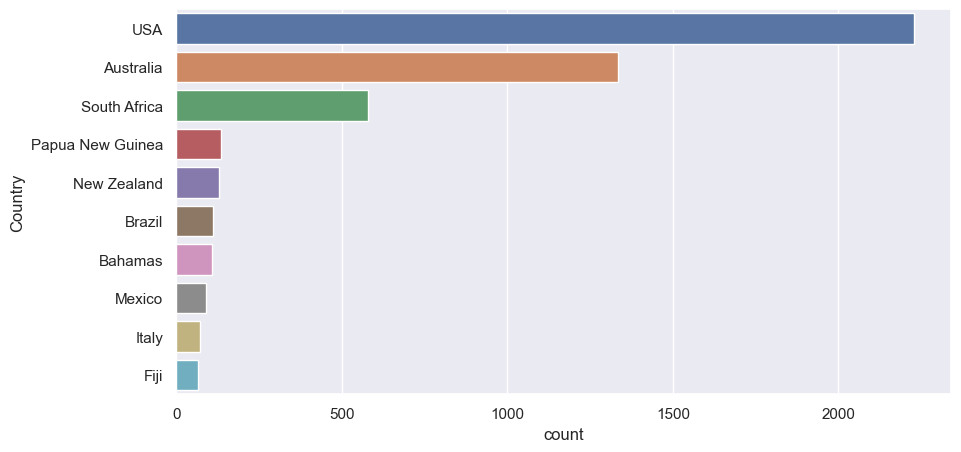

In [67]:
#Para que funcione con seaborn tengo que cambiarle el nombre de la columna Country a count
#me coje los 10 primeros ya que son los que voy a considerar como más relevantes

country_df = pd.DataFrame(cleaned_sharks["Country"].value_counts().iloc[0:10]).rename(columns={"Country": "count"})
fig_country_top = sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=country_df.index, x=country_df["count"]).tick_params(axis='x', rotation=0)
plt.show()





In [ ]:
Casos por mes 

Casos por mes y country

In [76]:
country_month_df = pd.DataFrame(cleaned_sharks[["Month", "Country", "Year","Season"]])

country_month_df = pd.DataFrame(country_month_df.loc[((country_month_df["Country"] == "USA") | (country_month_df["Country"] == "Australia") | (country_month_df["Country"] == "South Africa"))])




C:\Users\river\AppData\Local\Temp\ipykernel_3416\2938582594.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



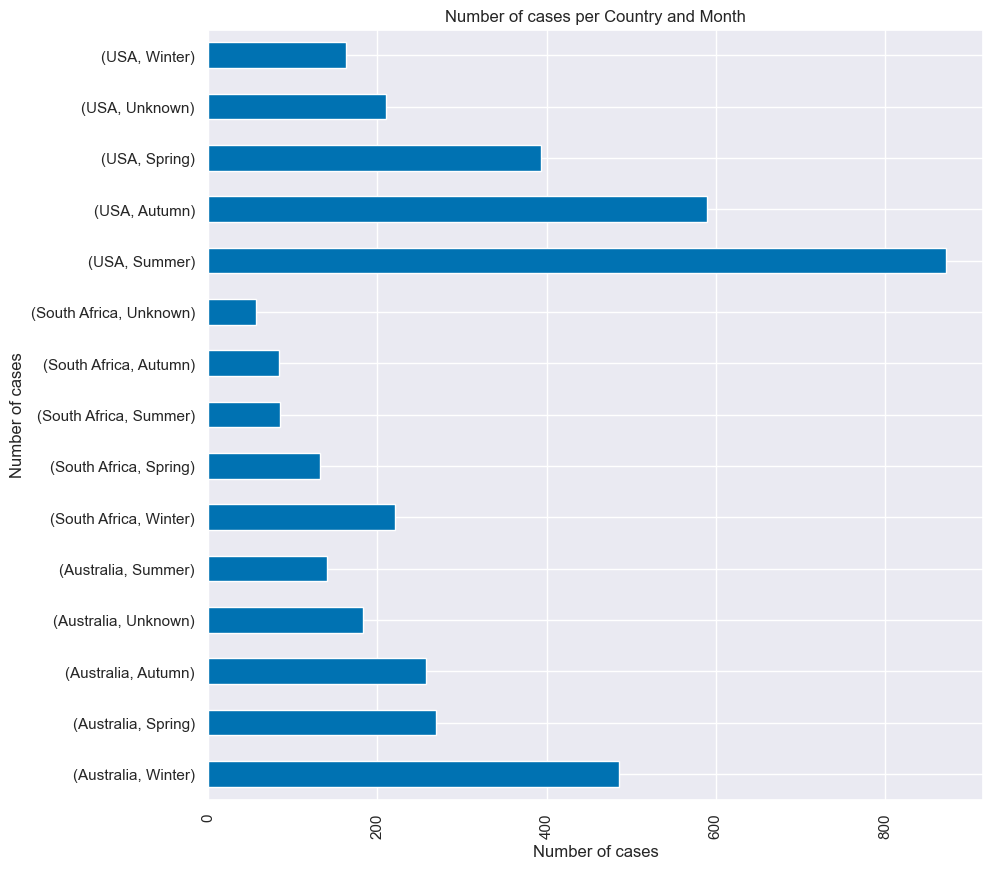

In [79]:
fig_country_month = country_month_df.groupby("Country")["Season"].value_counts().plot(kind = "barh",
                                                                 figsize = (10,10),
                                                                 
                                                                 title ="Number of cases per Country and Month",
                                                                 xlabel = "Country and Month", 
                                                                 ylabel="Number of cases")
plt.style.use("seaborn-colorblind")
plt.xticks(rotation=90)
plt.xlabel("Number of cases")
plt.show()